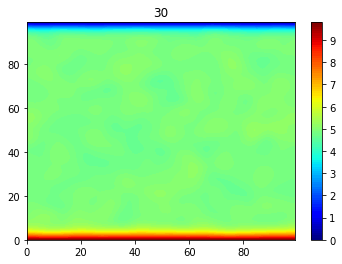

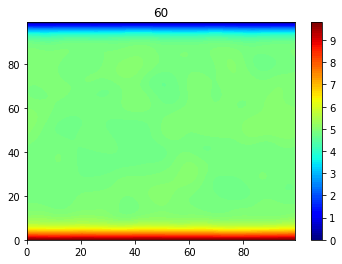

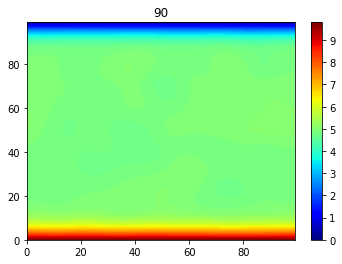

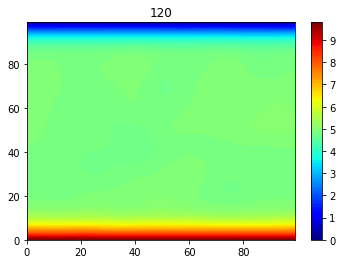

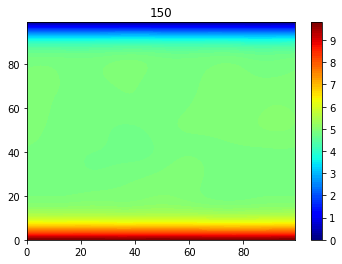

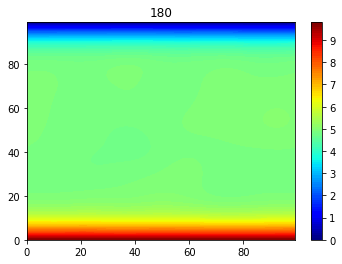

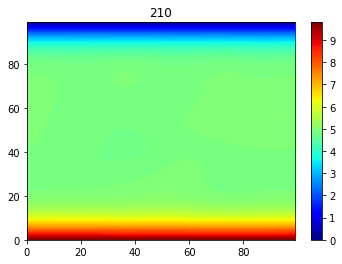

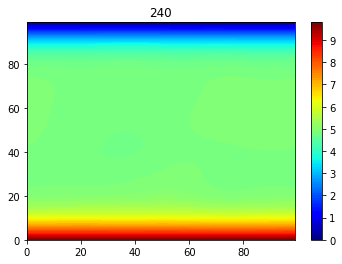

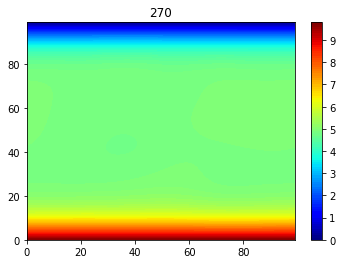

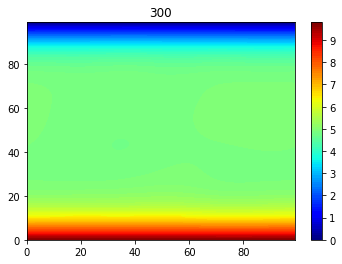

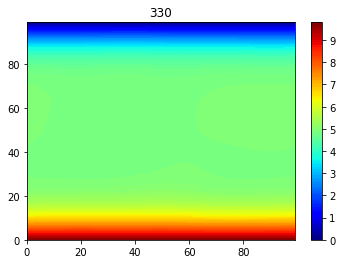

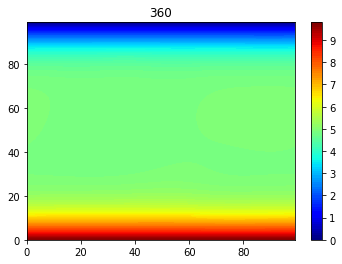

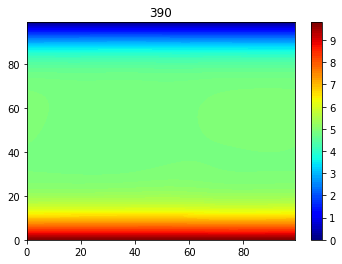

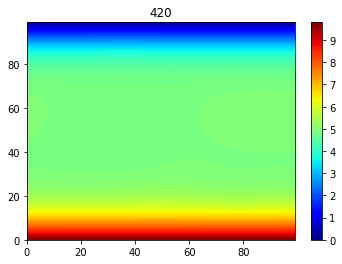

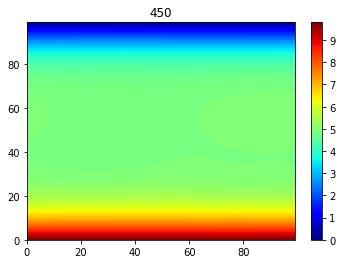

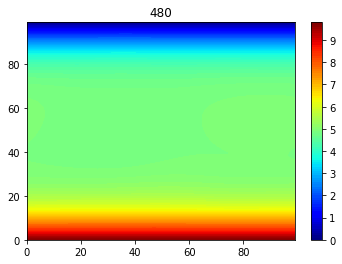

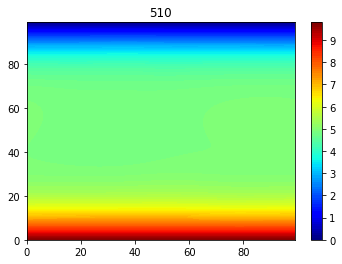

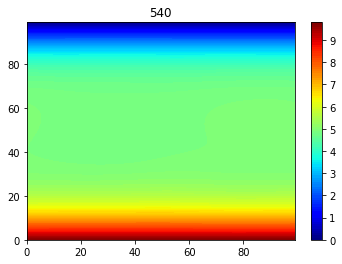

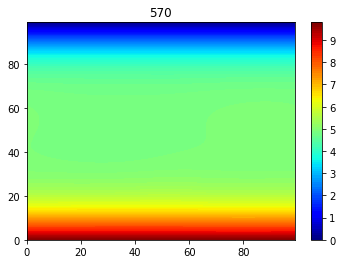

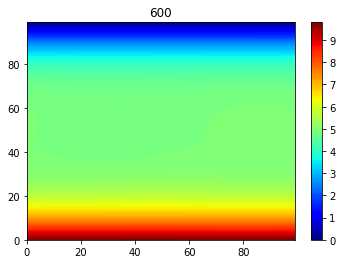

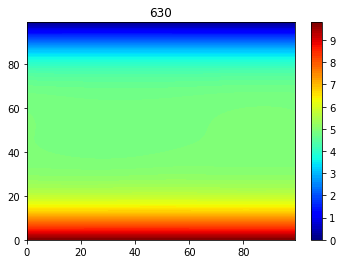

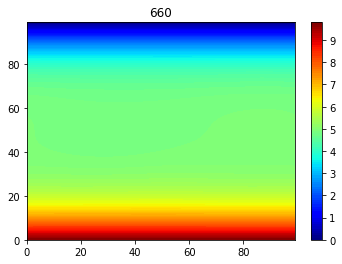

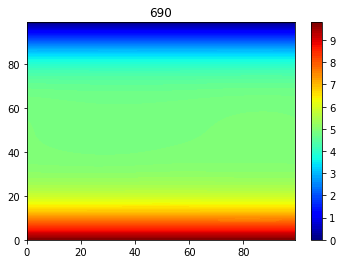

In [1]:
# Finite difference method
import numpy as np
import matplotlib.pyplot as plt
# Set up maximum iteration
maxIteration = 700
# Set Dimension  of grid and delta
Nx = 100
Ny = 100
delta = 1
D=np.random.uniform(-2,2,size=(Nx,Ny))
# Boundary condition
Ttop = 0 # Top as cooling surface
Tbottom = 9.80 # Bottom as heating surfaces
epsilon = 0.5
# Initial temperature of interior grid
T_intial = (Ttop + Tbottom)/2
# Set colour interpolation and colour map
colorinterpolation = 100
colourMap =  plt.cm.jet #we can try: colourMap = plt.cm.coolwarm
# Set up meshgrid
X, Y = np.meshgrid(np.arange(0, Nx), np.arange(0, Ny))
# Set array size and set the interior value with T_intial
T = np.empty((Nx, Ny)) 
T.fill(T_intial) # assign all the grid point by intial temperature
T= T + D
for iteration in range(0, maxIteration):
    T[:1, :] = Tbottom
    T[(Nx-1):, :] = Ttop
    for i in range(1, Nx-1, delta):
        for j in range(0, Ny, delta):
            if j==0:
                T[i, j] = (epsilon/4) * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1+Ny] - 4*T[i,j]) + T[i,j]
            elif j==Ny-1:
                T[i, j] = (epsilon/4) * (T[i+1][j] + T[i-1][j] + T[i][j+1-Ny] + T[i][j-1] - 4*T[i,j]) + T[i,j]
            else:
                T[i, j] = (epsilon/4) * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1] - 4*T[i,j]) + T[i,j]
    
    if (iteration >20):
        if (iteration)%30==0:
            plt.title(""+str(iteration))
            plt.contourf(X, Y, T , colorinterpolation, cmap=colourMap)
            plt.colorbar()
            plt.show()